# Project: No-show appointments Dataset

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#limitations">Limitations</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, i will investigate the **No-show appointments Dataset**.

I think one of the key factors that made me choose the dataset is that intersting conclusions can be drawn from the given data samples.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Questions:

**Q1** : What is the effect of age on the show-up percentages?<br>
**Q2** : Do people tend to show-up when the period between scheduling date and appointment date change?
#### Candidate questions (can't be answered using the dataset)
**-** Is there a relation between show-up percentages and period of year? **(All data ranges between April and June)**<br>
**-** Is there a relation between show-up percentages and weekends? **(All appointments aren't on weekends)**


In [3]:
# Load the data and show the top 5 rows (samples)
df = pd.read_csv('noshowappointments-kagglev2-may-2016.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


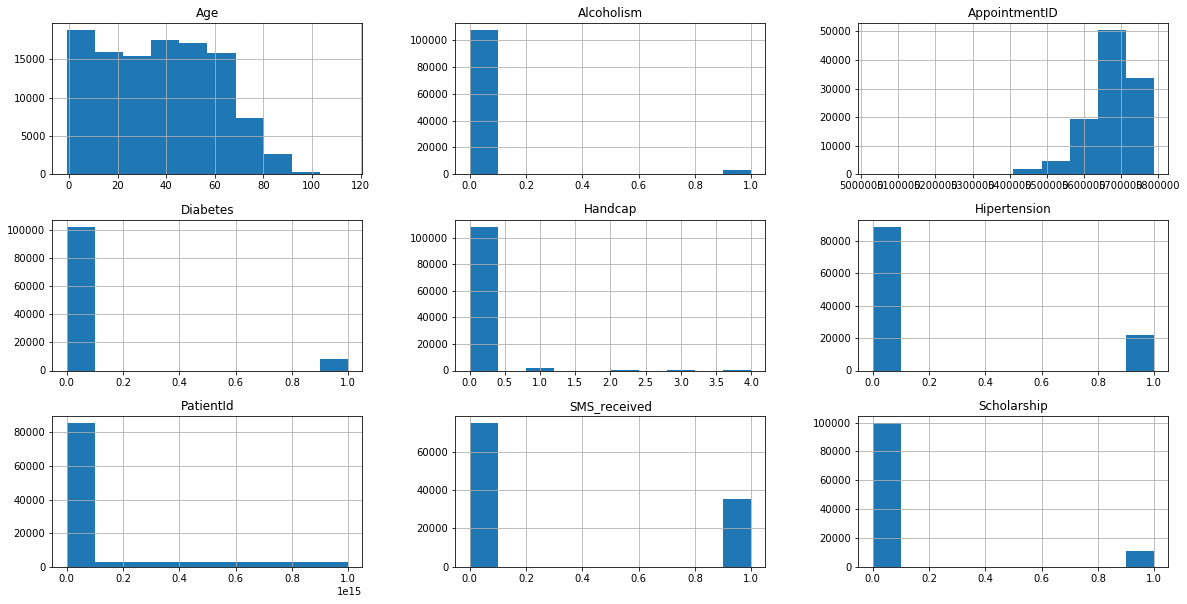

In [4]:
# Draw histogram plots
df.hist(figsize=(20,10));

<a id='wrangling'></a>
## Data Wrangling

In [5]:
# Check if Null values exist
df.info()
# RESULT: No non-null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [6]:
# View some descriptive statistics for each attribute in the Data Set
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


In [7]:
# Make sure that AppointmentIDs are unique
len(df['AppointmentID'].unique())
# RESULT: All the values are unique -- OK

110527

In [8]:
# From age statistics, it is found that the min value is -1!
df.query('Age<0')
# RESULT: The single sample need to be fixed -- Drop this data sample from the dataframe

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,2016-06-06T00:00:00Z,-1,ROMÃO,0,0,0,0,0,0,No


In [9]:
# Check the values of the Handicap column
df['Handcap'].value_counts()
# RESULT: The values may mean the number of malfunctioning limbs

0    108286
1      2042
2       183
3        13
4         3
Name: Handcap, dtype: int64

In [10]:
# Check for duplicated data samples
sum(df.duplicated())
# RESULT: No duplications

0

In [11]:
# Check the type of AppointmentDay attribute
type(df['AppointmentDay'][0])
# RESULT: It's a string -- Needs to be casted to Date

str

In [12]:
# Check the values of the No-show attribute
df['No-show'].value_counts()
# RESULT: The values are [No-Yes] -- Needs to be mapped to bool

No     88208
Yes    22319
Name: No-show, dtype: int64

### Data Cleaning (Fix Names & Datatypes - Extract new features)

In [13]:
# Fix the names of some columns
df.rename(columns={'Handcap': 'Handicap', 'Hipertension': 'Hypertension'}, inplace = True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hypertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handicap          110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [14]:
def cols_to_datetime(df, cols):
    """ Convert string to Date object.
    The time part of the timestamp is dropped
    """
    for col in cols:
        df[col] = pd.to_datetime(df[col]).apply(lambda d: d.date())

def cols_number_to_bool(df, cols):
    """ Convert integer values to boolean."""
    for col in cols:
        df[col] = df[col].apply(bool)

def cols_yes_no_to_bool(df, cols):
    """ Map Yes/No values to boolean."""
    for col in cols:
        df[col] = (df[col] == 'Yes')

In [15]:
# Perform the required type casting
cols_to_datetime(df, ['AppointmentDay', 'ScheduledDay'])
cols_number_to_bool(df, ['Scholarship', 'Hypertension', 'Diabetes', 'Alcoholism', 'SMS_received'])
cols_yes_no_to_bool(df, ['No-show'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null bool
Hypertension      110527 non-null bool
Diabetes          110527 non-null bool
Alcoholism        110527 non-null bool
Handicap          110527 non-null int64
SMS_received      110527 non-null bool
No-show           110527 non-null bool
dtypes: bool(6), float64(1), int64(3), object(4)
memory usage: 7.4+ MB


In [16]:
# Drop the No-show column and replace it by a more meaningful column
Patient_Showup_col = ~df['No-show']
df.drop(['No-show'], axis=1, inplace=True)
df['Showed_up'] = Patient_Showup_col
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null bool
Hypertension      110527 non-null bool
Diabetes          110527 non-null bool
Alcoholism        110527 non-null bool
Handicap          110527 non-null int64
SMS_received      110527 non-null bool
Showed_up         110527 non-null bool
dtypes: bool(6), float64(1), int64(3), object(4)
memory usage: 7.4+ MB


In [17]:
# Extract the parameters that have valid Age values
df = df.query('Age>=0')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110526 non-null float64
AppointmentID     110526 non-null int64
Gender            110526 non-null object
ScheduledDay      110526 non-null object
AppointmentDay    110526 non-null object
Age               110526 non-null int64
Neighbourhood     110526 non-null object
Scholarship       110526 non-null bool
Hypertension      110526 non-null bool
Diabetes          110526 non-null bool
Alcoholism        110526 non-null bool
Handicap          110526 non-null int64
SMS_received      110526 non-null bool
Showed_up         110526 non-null bool
dtypes: bool(6), float64(1), int64(3), object(4)
memory usage: 8.2+ MB


In [18]:
# Check if there is a sample with AppointmentDay coming before ScheduledDay
df = df.query('ScheduledDay<=AppointmentDay')
# RESULT: OK

In [19]:
'''
Check the month and weekday of Appointments.
df['AppointmentDay'].map(lambda d: d.month).hist();
df['AppointmentDay'].value_counts()
df['AppointmentDay'].map(lambda d: d.weekday()).hist();
'''

"\nCheck the month and weekday of Appointments.\ndf['AppointmentDay'].map(lambda d: d.month).hist();\ndf['AppointmentDay'].value_counts()\ndf['AppointmentDay'].map(lambda d: d.weekday()).hist();\n"

In [20]:
df['Period_between_sch_app'] = (df['AppointmentDay'] - df['ScheduledDay']).map(lambda td: td.days)

<a id='eda'></a>
## Exploratory Data Analysis


### Research Question 1 : What is the effect of age on the show-up percentages?


In [21]:
def find_showup_percentage_grouped_by(df, cols):
    """ Return a new dataframe containing a Percentage column.
    The dataframe also contains Showed_up, Total_appointments
    and the cols that are used to group data."""
    show_df = df.query('Showed_up').groupby(cols)['Showed_up'].count().to_frame().reset_index()
    total_df = df.groupby(cols)['Showed_up'].count().to_frame().reset_index()
    total_df.rename(columns={'Showed_up': 'Total_appointments'}, inplace = True)
    ndf = pd.merge(show_df, total_df, how='outer', on=cols)
    ndf.fillna(0, inplace=True)
    ndf['Percentage'] = ndf['Showed_up'] / (ndf['Total_appointments'])
    return ndf

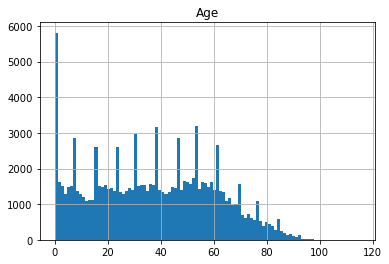

In [22]:
# Check the distribution of appointments as a function of age
df.hist(column='Age', bins=100);

First the show-up Percentages will be investigated using a scatterplot.

0.390709891206


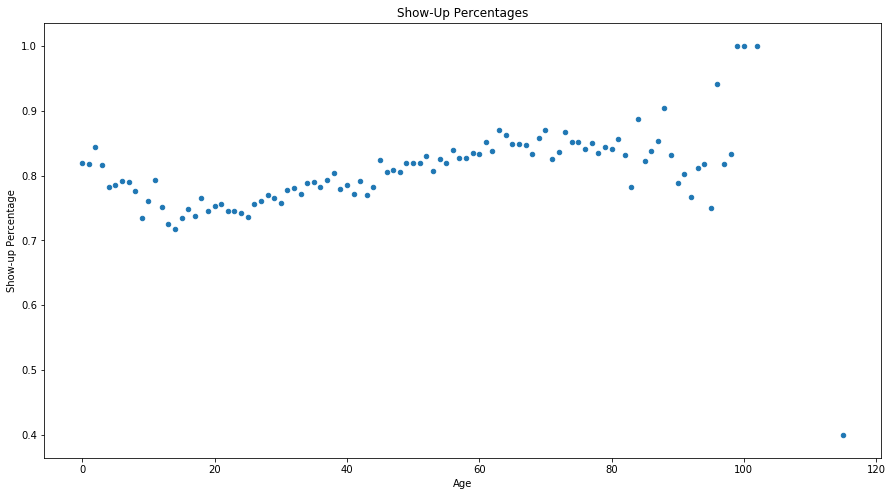

In [23]:
age_percentage_df = find_showup_percentage_grouped_by(df, ['Age'])
ax = age_percentage_df.plot.scatter(x='Age', y='Percentage', figsize=(15,8), title='Show-Up Percentages');
ax.set_xlabel('Age')
ax.set_ylabel('Show-up Percentage')
print(age_percentage_df['Age'].corr(age_percentage_df['Percentage']))
# The Data doesn't seem to have a general increasing or decreasing trends

It is found that there are different trends/behaviours for different age groups.

The show-up percentages will be investigated for young, middle and old ages.

-0.880381091247


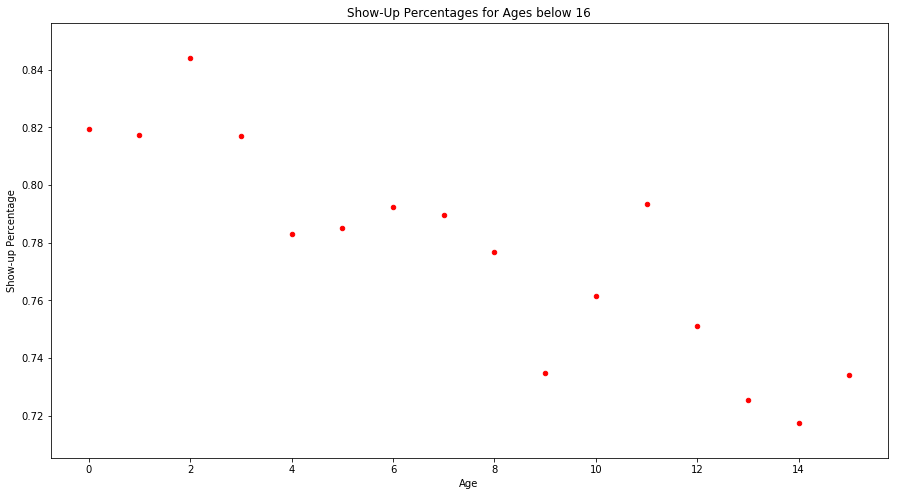

In [24]:
# Below 16
samples_below_16_df = df.query('Age <=15')
samples_below_16_df = find_showup_percentage_grouped_by(samples_below_16_df, ['Age'])
ax = samples_below_16_df.plot.scatter(x='Age', y='Percentage', figsize=(15,8), 
                                      c='r', title='Show-Up Percentages for Ages below 16');
ax.set_xlabel('Age')
ax.set_ylabel('Show-up Percentage')
print(samples_below_16_df['Age'].corr(samples_below_16_df['Percentage']))

**For ages less than 16** , It is found that the showup percentage is negatively correlated with the age.

0.936224349421


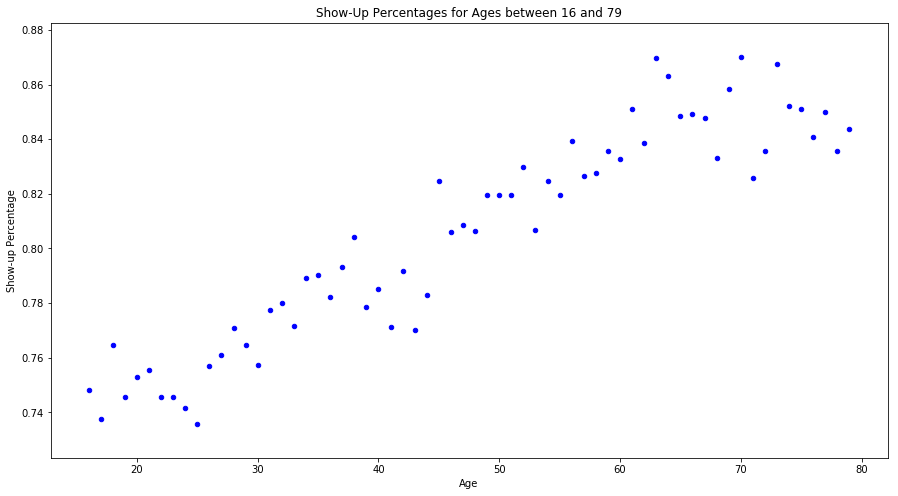

In [25]:
# Above 15 and below 80
samples_between_16_and_79_df = df.query('Age >15 and Age<80')
samples_between_16_and_79_df = find_showup_percentage_grouped_by(samples_between_16_and_79_df, ['Age'])
ax = samples_between_16_and_79_df.plot.scatter(x='Age', y='Percentage', figsize=(15,8), 
                                      c='b', title='Show-Up Percentages for Ages between 16 and 79');
ax.set_xlabel('Age')
ax.set_ylabel('Show-up Percentage')
print(samples_between_16_and_79_df['Age'].corr(samples_between_16_and_79_df['Percentage']))

**For ages between 16 and 79** , It is found that the showup percentage is positively correlated with the age.

-0.292731321888


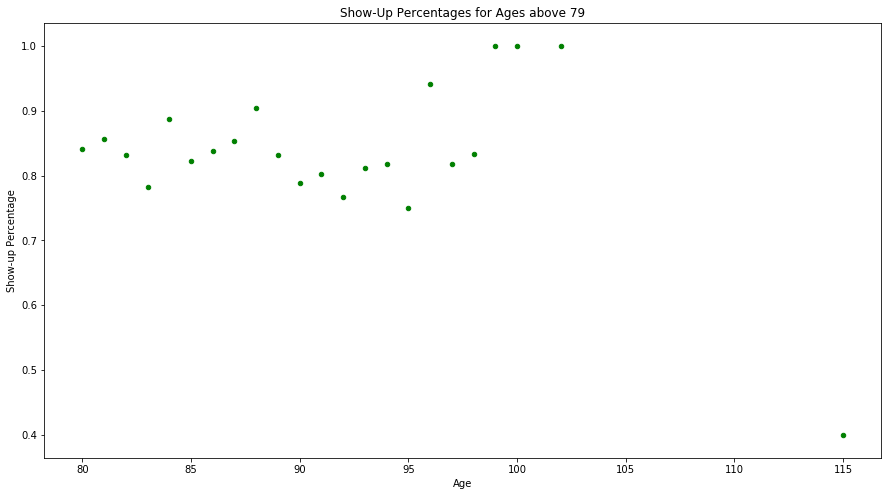

In [26]:
# Above 79
samples_above_79_df = df.query('Age >=80')
samples_above_79_df = find_showup_percentage_grouped_by(samples_above_79_df, ['Age'])
ax = samples_above_79_df.plot.scatter(x='Age', y='Percentage', figsize=(15,8), 
                                      c='g', title='Show-Up Percentages for Ages above 79');
ax.set_xlabel('Age')
ax.set_ylabel('Show-up Percentage')
print(samples_above_79_df['Age'].corr(samples_above_79_df['Percentage']))

**For ages above 80** , It is found that the showup percentage tend to be weakly correlated with the age.

### The final plot summarizes the plots for different age sectors

Correlation Coefficients:
-0.880381091247
0.936224349421
-0.292731321888


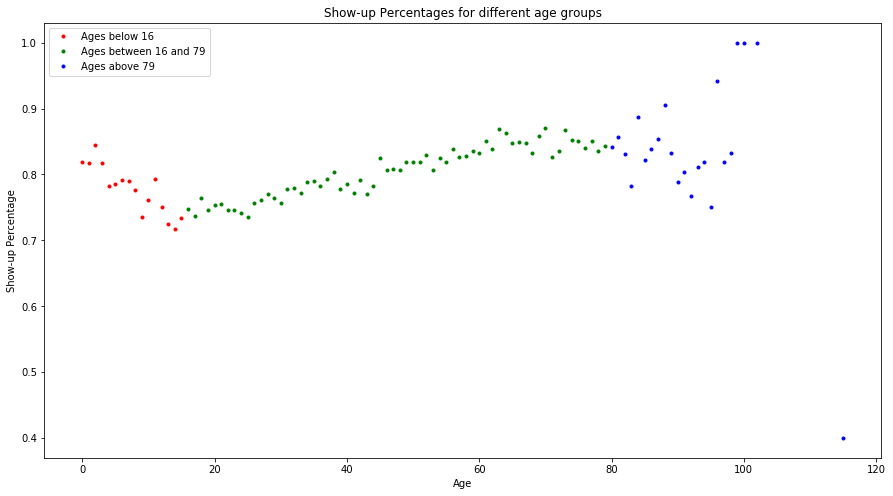

In [28]:
dfs = [samples_below_16_df, samples_between_16_and_79_df, samples_above_79_df]
plt.figure(figsize=(15,8))
labels =['Ages below 16', 'Ages between 16 and 79', 'Ages above 79']
print('Correlation Coefficients:')
colors = ['r.','g.','b.']
for dframe in dfs:
    plt.plot(dframe['Age'],dframe['Percentage'], colors[0], label=labels[0]);
    plt.legend()
    colors.pop(0)
    labels.pop(0)
    print(dframe['Age'].corr(dframe['Percentage']))
plt.xlabel('Age');
plt.ylabel('Show-up Percentage');
plt.title('Show-up Percentages for different age groups');

### Research Question 2 : Do people tend to show-up when the period between scheduling date and appointment date change?

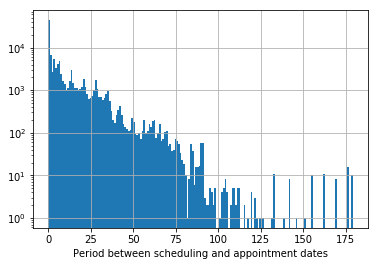

In [29]:
# Check the distribution of appointments as a function of Period between scheduling and appointment dates.
ax = df['Period_between_sch_app'].hist(bins=176, log=True);
ax.set_xlabel('Period between scheduling and appointment dates');

In [30]:
df['Period_between_sch_app'].describe()

count    110521.000000
mean         10.184345
std          15.255153
min           0.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: Period_between_sch_app, dtype: float64

It is found that 50% of the appointments are scheduled just 4 days or less before the appointment date.

Also, some periods occur only once. These periods will be dropped from the upcoming plots.

In [31]:
def drop_rare_cells_below_threshold(df, threshold, col):
    ndf = df.copy()
    value_counts =ndf[col].value_counts() # Specific column 
    to_remove = value_counts[value_counts <= threshold].index
    ndf[col].replace(to_remove, np.nan, inplace=True)
    return ndf

### Intuition for Effect of period on Show-up percentages
It is expected that the show-up percentage is bell-shaped (parabolic) with higher show-up percentages for very small and very large periods and lower show-up percentages in between.

0.719544755891


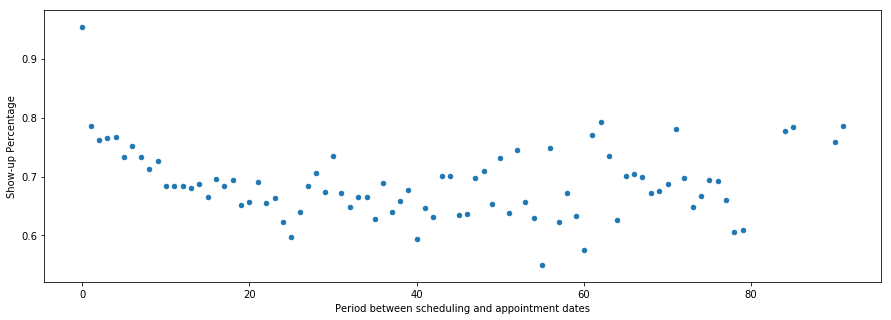

In [33]:
# Drop the Periods that occur rarely
# Use a threshold value at 20
col = 'Period_between_sch_app'
threshold = 20
ndf = drop_rare_cells_below_threshold(df, threshold, col)
period_percentage_df = find_showup_percentage_grouped_by(ndf, ['Period_between_sch_app'])
ax = period_percentage_df.plot.scatter(x='Period_between_sch_app', y='Percentage', figsize=(15,5));
ax.set_xlabel('Period between scheduling and appointment dates')
ax.set_ylabel('Show-up Percentage')
print(period_percentage_df['Period_between_sch_app'].corr(age_percentage_df['Percentage']))

The correlation coefficient indicates that there is a relation between the period between scheuling and appointment dates and the show-up percentage.<br>
However, the correlation coefficient shows that two variables aren't strongly correlated.

<a id='limitations'></a>
## Limitations

Throughout the analysis, i couldn't answer some intersting questions due to limitations in the data.

For example, all the appointments are on weekdays thus i couldn't compare between the show-up behaviour for weekdays and weekends.
Also, all the appointments are between April and June so i couldn't determine the variation in the show-up percentages for different seasons.

<a id='conclusions'></a>
## Conclusions

**Regarding Question 1**:

It is found that for young ages(Below 16), the showup percentages decrease as the age increases.
This seems to be Intuitive. The smaller the children are, the more careful their parents are.

For the range between 16 and 79, the showup percentages increase as the age increases.

For old ages (Above 79), there is no clear trend in the showup percentages.


**Regarding Question 2**:

There is a rise in the showup percentages as the period between the schedule and appointment dates increase.
However, the trend isn't clear enough.

One way to justify this is that people who schedule appointments very early may suffer from severe diseases/injuries. Thus, they will showup at a very high probablility.

Additionally, It is found that appointments that are scheduled on the appointment day have very high show-up percentages.